    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Value counts for the binary target variable:
target
0    164
1    139
Name: count, dtype: int64

Statistical Summary of 

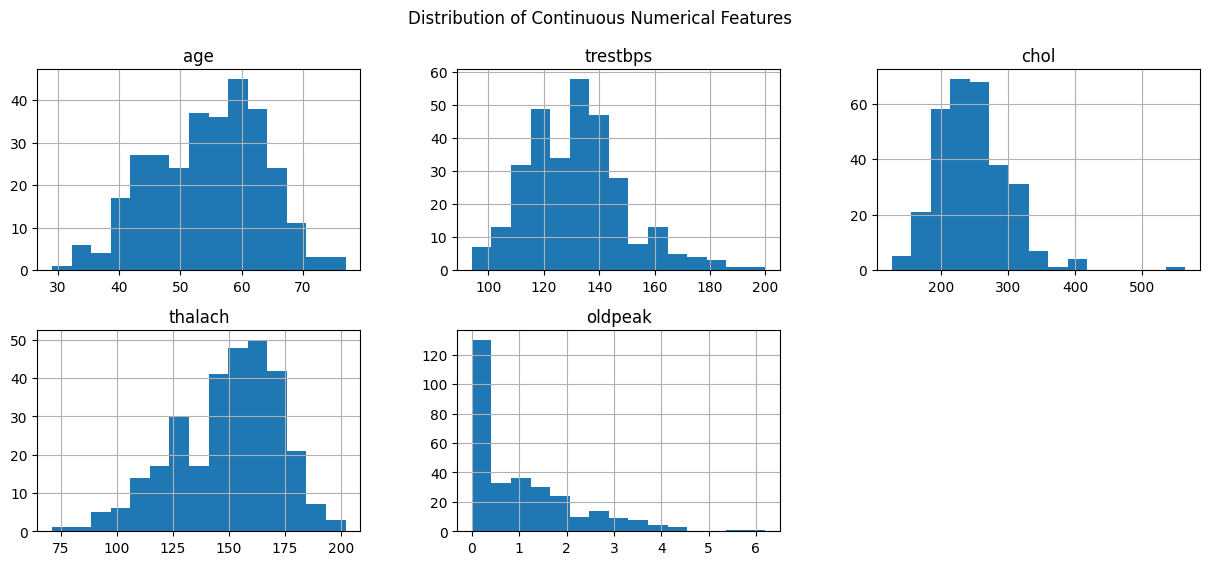


Training set shape (X_train, y_train): (242, 20) (242,)
Testing set shape (X_test, y_test): (61, 20) (61,)

Training features after standardization and normalization:
          age  trestbps      chol   thalach   oldpeak   sex_1.0    cp_2.0  \
132 -0.670167 -0.029744 -0.204023  0.546443 -0.206249  0.236099  0.236099   
202  0.065168  0.263166 -0.670607  0.275745 -0.190318  0.270010  0.000000   
196  0.467158  0.456291 -0.072188 -0.254843 -0.236143  0.299213  0.000000   
75   0.334105  0.454378  0.707607  0.011969 -0.059204  0.000000  0.000000   
176 -0.112004 -0.485102 -0.095092 -0.050157 -0.286418  0.362915  0.000000   

       cp_3.0    cp_4.0   fbs_1.0  restecg_1.0  restecg_2.0  exang_1.0  \
132  0.000000  0.000000  0.000000          0.0     0.236099        0.0   
202  0.270010  0.000000  0.270010          0.0     0.000000        0.0   
196  0.000000  0.000000  0.299213          0.0     0.299213        0.0   
75   0.297959  0.000000  0.000000          0.0     0.297959        0.0   

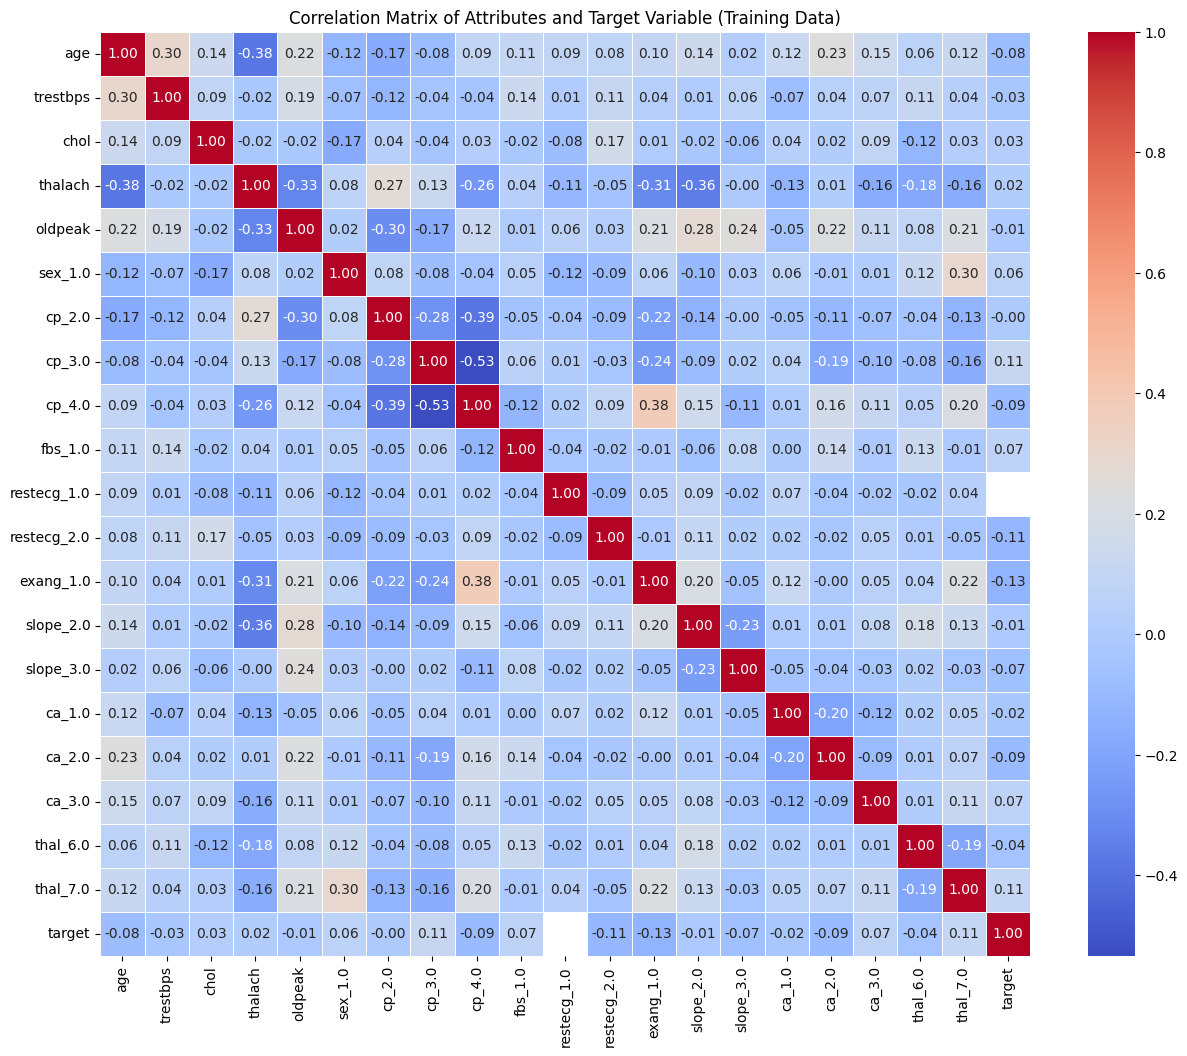


Generating scatter plots for the top 10 features based on training data correlation:


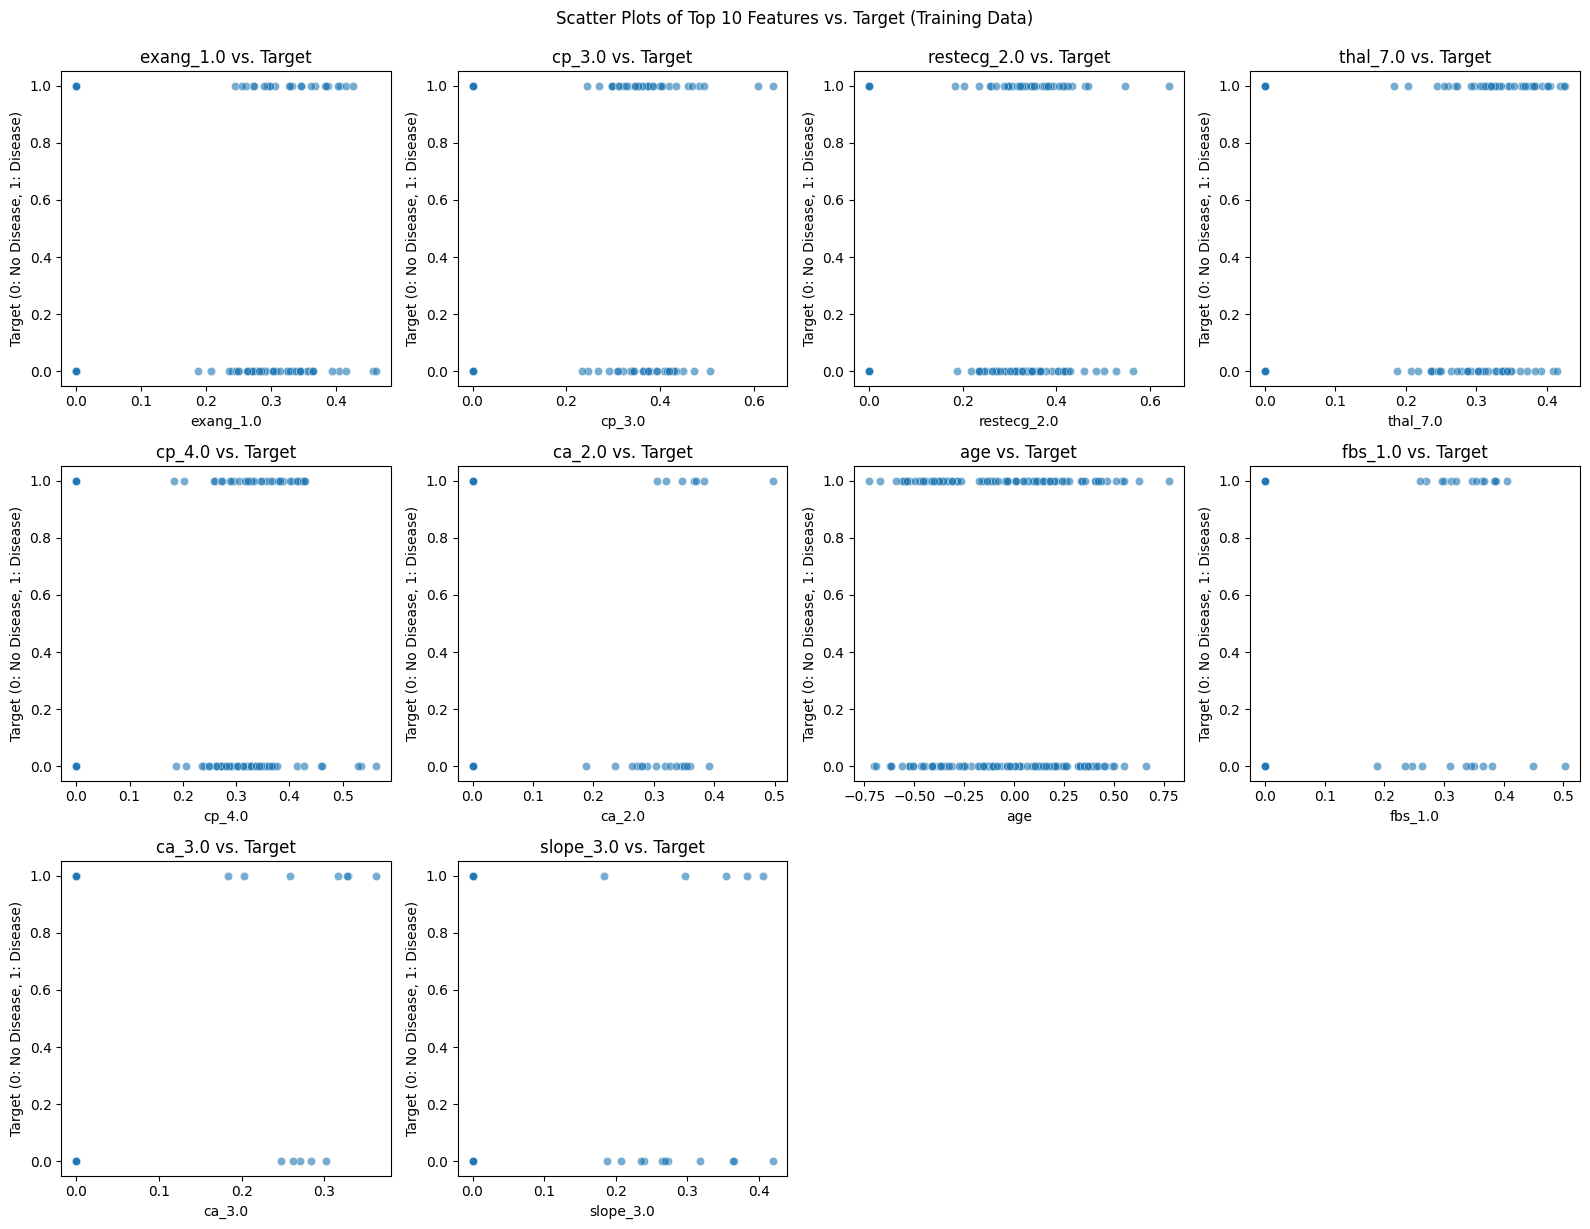


Selected important attributes based on Training Data (Top 10):
['exang_1.0', 'cp_3.0', 'restecg_2.0', 'thal_7.0', 'cp_4.0', 'ca_2.0', 'age', 'fbs_1.0', 'ca_3.0', 'slope_3.0']

Training features with selected attributes:
     exang_1.0    cp_3.0  restecg_2.0  thal_7.0    cp_4.0  ca_2.0       age  \
132        0.0  0.000000     0.236099  0.000000  0.000000     0.0 -0.670167   
202        0.0  0.270010     0.000000  0.270010  0.000000     0.0  0.065168   
196        0.0  0.000000     0.299213  0.000000  0.000000     0.0  0.467158   
75         0.0  0.297959     0.297959  0.000000  0.000000     0.0  0.334105   
176        0.0  0.000000     0.000000  0.362915  0.362915     0.0 -0.112004   

      fbs_1.0    ca_3.0  slope_3.0  
132  0.000000  0.000000        0.0  
202  0.270010  0.000000        0.0  
196  0.299213  0.000000        0.0  
75   0.000000  0.000000        0.0  
176  0.362915  0.362915        0.0  

Testing features with selected attributes:
     exang_1.0    cp_3.0  restecg_2.0 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

# step 1: choose dataset and load directly form UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# define column names
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

# attribute explanations:
# 1. age: Age in years (Continuous)
# 2. sex: Sex (1 = male; 0 = female) (Categorical)
# 3. cp: Chest pain type (4 values: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) (Categorical)
# 4. trestbps: Resting blood pressure in mm Hg on admission to the hospital (Continuous)
# 5. chol: Serum cholestoral in mg/dl (Continuous)
# 6. fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
# 7. restecg: Resting electrocardiographic results (3 values: 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy) (Categorical)
# 8. thalach: Maximum heart rate achieved (Continuous)
# 9. exang: Exercise induced angina (1 = yes; 0 = no) (Categorical)
# 10. oldpeak: ST depression induced by exercise relative to rest (Continuous)
# 11. slope: The slope of the peak exercise ST segment (3 values: 1 = upsloping, 2 = flat, 3 = downsloping) (Categorical)
# 12. ca: Number of major vessels (0-3) colored by flourosopy (Categorical, requires imputation)
# 13. thal: Thalassemia (3 values: 3 = normal, 6 = fixed defect, 7 = reversable defect) (Categorical, requires imputation)
# 14. target: Diagnosis of heart disease (angiographic disease status). The initial values were 0 (no disease) and 1, 2, 3, 4 (presence of disease).

# load the data
df = pd.read_csv(url, header=None, names=column_names)
print(df.head())

# step 2: examine data for consistency
# remove null or NA values
df = df.dropna()

# remove redundant rows
df = df.drop_duplicates()

df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# missing values with the mode
for column in ['ca', 'thal']:
    mode_val = df[column].mode()[0]
    df[column] = df[column].fillna(mode_val)

# verify that there are no more missing values
print("Missing values after imputation:")
print(df.isnull().sum())

# convert the target column to a binary format (0 or 1)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nValue counts for the binary target variable:")
print(df['target'].value_counts())

# explicitly cast the target to an integer type for classification models
df['target'] = df['target'].astype(int)

# step 3: examining attributes and target variable
# output a summary of the attributes
print("\nStatistical Summary of All Attributes:")
print(df.describe().T)

# convert categorical features using one-hot encoding
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# using dummy variables for one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# remove columns with zero variance after one-hot encoding
zero_variance_cols = df.columns[df.var() == 0]
df = df.drop(columns=zero_variance_cols)
print(f"\nRemoved columns with zero variance: {list(zero_variance_cols)}")

# analyzing the distribution of original numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# ensure only numerical features that still exist after removing zero variance columns are plotted
numerical_features_after_removal = [col for col in numerical_features if col in df.columns]
df[numerical_features_after_removal].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribution of Continuous Numerical Features')
plt.show()

# Are the attributes normally distributed? If not, what could be the reason?
# Answer: Based on the histograms provided, the continuous numerical attributes
# in the Heart Disease dataset are generally not normally distributed. The
# features age and thalach (maximum heart rate achieved) appear the most symmetric
# and closest to a normal distribution, though even they show slight skewness.
# In contrast, trestbps (resting blood pressure) and chol (serum cholesterol)
# both exhibit a distinct right-skew, meaning the bulk of the observations are
# clustered at the lower-to-middle values, with a long tail extending toward higher
# values. The feature oldpeak (ST depression induced by exercise relative to rest)
# displays the most severe deviation, showing a concentration (or "floor effect")
# near zero, resulting in a highly right-skewed distribution. The non-normal
# nature of these attributes is typically attributed to the natural skewness
# of biological metrics in a population and the sample selection bias inherent
# in clinical datasets, which tend to over-represent individuals presenting with
# symptoms, moving the distribution away from a general population mean.

# split data into features (X) and target (y) before splitting into train/test
X = df.drop('target', axis=1)
y = df['target']

# split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

# step 4: standardize and normalize attributes AFTER SPLITTING
# slect numerical features for standardization (these are the same numerical features as before)
# ensure only numerical features that still exist after removing zero variance columns are selected for scaling
numerical_features_for_scaling = [col for col in numerical_features_after_removal if col in X_train.columns]

# initialize StandardScaler
scaler = StandardScaler()

# fit the scaler on the training data ONLY and transform training data
X_train[numerical_features_for_scaling] = scaler.fit_transform(X_train[numerical_features_for_scaling])

# transform the testing data using the scaler fitted on the training data
X_test[numerical_features_for_scaling] = scaler.transform(X_test[numerical_features_for_scaling])

# normalize the entire datasets (excluding the target variable) AFTER SPLITTING
# apply L2 normalization separately to training and testing features
X_train_normalized = X_train.apply(lambda x: x / np.linalg.norm(x), axis=1)
X_test_normalized = X_test.apply(lambda x: x / np.linalg.norm(x), axis=1)

print("\nTraining features after standardization and normalization:")
print(X_train_normalized.head())

print("\nTesting features after standardization and normalization:")
print(X_test_normalized.head())

# step 5: Find how the attributes are correlated to each other and the target variable
# combine X_train_normalized and y_train to calculate correlations
df_train_combined = X_train_normalized.copy()
df_train_combined['target'] = y_train.reset_index(drop=True) # Ensure index alignment

# drop columns with zero variance in the training set before correlation to prevent NaN
cols_to_drop_train = df_train_combined.columns[(df_train_combined.std() == 0) | (df_train_combined.var() == 0)]
cols_to_drop_train = cols_to_drop_train[cols_to_drop_train != 'target']

if len(cols_to_drop_train) > 0:
    df_train_combined = df_train_combined.drop(columns=cols_to_drop_train)
    # ensure X_train_normalized and X_test_normalized are also updated for clean feature selection
    X_train_normalized = X_train_normalized.drop(columns=cols_to_drop_train)
    X_test_normalized = X_test_normalized.drop(columns=cols_to_drop_train)
    print(f"\nFIX: Dropped zero-variance columns from X_train_normalized: {list(cols_to_drop_train)}")

# correlation matrix for training data (recalculate)
correlation_matrix_train = df_train_combined.corr()

# correlation of attributes with the target variable in training data
print("\nCorrelation with the target variable (Training Data):")
print(correlation_matrix_train['target'].sort_values(ascending=False))

# visualizing the correlation with a heatmap (optional, for training data)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Attributes and Target Variable (Training Data)')
plt.show()

# The heatmap provides a visual representation of the linear relationships between
# the standardized and L2-normalized attributes. The final column, labeled 'target',
# shows the correlation of each feature with the presence of heart disease. After
# the aggressive L2 normalization step, all attribute-to-target correlations are
# generally weak, with absolute values below 0.14. The strongest positive relationship
# is with cp_3.0 (Atypical Angina, correlation ≈0.11), and the strongest negative
# relationship is with exang_1.0 (Exercise Induced Angina, correlation ≈−0.13).
# Regarding inter-feature correlation (multicollinearity), the highest values
# (up to ≈0.53) are logically confined to dummy variables derived from the same
# source categorical feature (e.g., between different chest pain types). Since no
# attribute-to-attribute correlation is found above 0.7 or 0.8, the models should
# not suffer from severe redundancy issues.

# list of top 10 selected features
abs_correlation_with_target_train_for_viz = correlation_matrix_train['target'].abs().sort_values(ascending=False)
num_features_to_visualize = 10
top_features_for_viz = abs_correlation_with_target_train_for_viz[1:num_features_to_visualize + 1].index.tolist()
print(f"\nGenerating scatter plots for the top {num_features_to_visualize} features based on training data correlation:")

# determine the layout for subplots
n_features_viz = len(top_features_for_viz)
n_cols_viz = 4  # You can adjust the number of columns
n_rows_viz = (n_features_viz + n_cols_viz - 1) // n_cols_viz

plt.figure(figsize=(n_cols_viz * 4, n_rows_viz * 4))

for i, feature in enumerate(top_features_for_viz):
    plt.subplot(n_rows_viz, n_cols_viz, i + 1)

    # use the combined training data for plotting
    sns.scatterplot(data=df_train_combined, x=feature, y='target', alpha=0.6)
    plt.title(f'{feature} vs. Target')
    plt.xlabel(feature)
    plt.ylabel('Target (0: No Disease, 1: Disease)')
    plt.tight_layout()

plt.suptitle(f'Scatter Plots of Top {num_features_to_visualize} Features vs. Target (Training Data)', y=1.02)
plt.show()

# The scatter plots visually confirm the weak predictive power of the individual
# features after the normalization process, where the target variable is correctly
# shown only at the binary values of 0 (No Disease) and 1 (Disease). For every
# single feature plotted, the data points belonging to Target 0 and Target 1 are
# heavily overlapped across the entire range of the feature's X-axis values.
# This extreme overlap indicates that no single feature alone possesses the
# necessary separation power to reliably classify a patient as having or not
# having heart disease. This observation validates the low numerical correlation
# coefficients and underscores the necessity of using complex, non-linear ensemble
# models, like Random Forest and XGBoost, which are designed to combine these weak,
# interacting signals for effective classification.

# step 6: identify a few important attributes and proceed forward
# absolute correlation values with the target variable from training data (already calculated above)
abs_correlation_with_target_train = correlation_matrix_train['target'].abs().sort_values(ascending=False)

# select the top n important attributes based on training data correlation
num_top_features = 10 # Keeping the same number of top features for modeling

# exclude the target variable itself from the features list
top_features_train = abs_correlation_with_target_train[1:num_top_features + 1].index.tolist()

# select these top features from the normalized training and testing sets
# ensure the columns dropped due to zero variance in training are also dropped from X_test_normalized
X_train_selected = X_train_normalized[top_features_train]
X_test_selected = X_test_normalized[top_features_train]

print(f"\nSelected important attributes based on Training Data (Top {num_top_features}):")
print(top_features_train)

print("\nTraining features with selected attributes:")
print(X_train_selected.head())

print("\nTesting features with selected attributes:")
print(X_test_selected.head())

# step 7 - model construction: Plain Decision Tree Classifier
# define parameter grid for decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# initialize decision tree classifer
dt = DecisionTreeClassifier(random_state=42)

# initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# fit the grid_search object to the training data
grid_search.fit(X_train_selected, y_train)

# best parameters found by grid_search
print("\nBest parameters found for Decision Tree:")
print(grid_search.best_params_)

# Decision Tree Hyperparameter Analysis:
# - Rationale: A wide range of max_depth, split, and leaf constraints were tested to find
# the best balance between model complexity and generalization, ensuring the final
# model was not severely underfit or overfit to the training data.
# - Best Values Found: Criterion: gini, Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2.
# - Conclusion: The search successfully identified constraints that balance complexity; the optimal
# max_depth=None suggests the model required the full complexity available within the other constraints.

# best estimator from the grid_search object
best_dt_model = grid_search.best_estimator_
dt_predictions = best_dt_model.predict(X_test_selected)

# evaluate the performance of the best_dt_model
accuracy = accuracy_score(y_test, dt_predictions)
precision = precision_score(y_test, dt_predictions)
recall = recall_score(y_test, dt_predictions)
f1 = f1_score(y_test, dt_predictions)

print(f"\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Metrics Analysis: The DT achieved an F1-score of 0.8065, showing a fair balance between
# Precision (0.8333) and Recall (0.7812). Precision is slightly higher, indicating the model
# is better at ensuring its positive predictions are correct than it is at catching all true positives.

#confusion matrix
conf_matrix = confusion_matrix(y_test, dt_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion Matrix Analysis: The matrix [[24 5] [7 25]] shows 24 true negatives (correctly predicted no disease)
# and 25 true positives (correctly predicted disease). The 7 False Negatives (FN) are the most critical
# errors in this medical context, as the model failed to detect disease in 7 patients.

# step 8 - model construction: Random Forest Classifier
# define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs=-1 uses all available cores

# fit the grid_search object to the training data using selected features
print("Performing GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train_selected, y_train)

# best parameters found by grid_search
print("\nBest parameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Random Forest Hyperparameter Analysis:
# - Rationale: Focused on 'n_estimators' and 'max_depth' as primary drivers, testing enough trees
# (up to 200) to stabilize ensemble variance.
# - Best Values Found: N Estimators: 200, Max Depth: 10, Min Samples Leaf: 4, Criterion: gini.
# - Conclusion: The optimal value for N_Estimators was found at the edge of the search range,
# but 200 was deemed sufficient for variance reduction, achieving one of the highest F1-scores.

# best estimator from the grid_search object
best_rf_model = grid_search_rf.best_estimator_

# make predictions on the test set using the best model
rf_predictions = best_rf_model.predict(X_test_selected)

# evaluate the performance of the best_rf_model
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions)
recall_rf = recall_score(y_test, rf_predictions)
f1_rf = f1_score(y_test, rf_predictions)

print(f"\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Metrics Analysis: The RF achieved a high F1-score of 0.8923, demonstrating a substantial
# improvement over the DT model. This improvement stems from a strong balance: Precision (0.8788)
# and Recall (0.9062). High Recall means the model is very effective at identifying true disease cases.

# confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Confusion Matrix Analysis: The matrix [[25 4] [3 29]] shows low error rates. Crucially, the model
# reduced False Negatives (FN) to only 3, making it much safer in a medical diagnostic context
# compared to the DT's 7 FNs.

# step 10 - model construction: XGBoost Classifier
# define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid_search object to the training data using selected features
print("Performing GridSearchCV for XGBoost...")
grid_search_xgb.fit(X_train_selected, y_train)

# best parameters found by grid_search
print("\nBest parameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# XGBoost Hyperparameter Analysis:
# - Rationale: Performed a wide search on critical parameters to control the bias-variance trade-off.
# - Best Values Found: N Estimators: 100, Learning Rate: 0.01, Max Depth: 7, Subsample: 0.8, Colsample_bytree: 1.0, Gamma: 0.
# - Conclusion: XGBoost performs best with a very conservative shrinkage (Learning Rate=0.01)
# combined with moderately deep trees, prioritizing stability and precision.

# best estimator from the grid_search object
best_xgb_model = grid_search_xgb.best_estimator_

# make predictions on the test set using the best model
xgb_predictions = best_xgb_model.predict(X_test_selected)

# evaluate the performance of the best_xgb_model
accuracy_xgb = accuracy_score(y_test, xgb_predictions)
precision_xgb = precision_score(y_test, xgb_predictions)
recall_xgb = recall_score(y_test, xgb_predictions)
f1_xgb = f1_score(y_test, xgb_predictions)

print(f"\nXGBoost Model Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

# Metrics Analysis: XGBoost achieved a very high F1-score of 0.8889. It prioritized Precision (0.9032)
# over Recall (0.8750), suggesting a focus on making highly accurate positive predictions. This priority
# is a characteristic of regularization in boosting.

# confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, xgb_predictions)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)

# Confusion Matrix Analysis: The matrix [[26 3] [4 28]] shows the highest number of True Negatives (26),
# meaning it is very accurate when predicting 'no disease'. Its False Negatives (4) are slightly higher
# than RF, confirming its slightly lower Recall compared to RF.

# step 9 - model construction: AdaBoost Classifier
# define parameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# initialize AdaBoost classifier
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42)

# initialize GridSearchCV
grid_search_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid_search object to the training data using selected features
print("Performing GridSearchCV for AdaBoost...")
grid_search_ab.fit(X_train_selected, y_train)

# best parameters found by grid_search
print("\nBest parameters found for AdaBoost:")
print(grid_search_ab.best_params_)

# Adaboost Hyperparameter Analysis:
# - Rationale: Tuned 'n_estimators' and 'learning_rate', fixing the base estimator to a Decision Stump.
# - Best Values Found: N Estimators: 100, Learning Rate: 0.1.
# - Conclusion: These values maximize the model's ability to correct previous errors without
# overfitting the training examples too quickly, and the optimal values were well within the tested ranges.

# best estimator from the grid_search object
best_ab_model = grid_search_ab.best_estimator_

# make predictions on the test set using the best model
ab_predictions = best_ab_model.predict(X_test_selected)

# evaluate the performance of the best_ab_model
accuracy_ab = accuracy_score(y_test, ab_predictions)
precision_ab = precision_score(y_test, ab_predictions)
recall_ab = recall_score(y_test, ab_predictions)
f1_ab = f1_score(y_test, ab_predictions)

print(f"\nAdaBoost Model Performance:")
print(f"Accuracy: {accuracy_ab:.4f}")
print(f"Precision: {precision_ab:.4f}")
print(f"Recall: {recall_ab:.4f}")
print(f"F1-score: {f1_ab:.4f}")

# Metrics Analysis: AdaBoost achieved an F1-score of 0.8182, placing its performance just above
# the single Decision Tree. It shows strong Recall (0.8438) but lower Precision (0.7941),
# indicating it is more aggressive in predicting disease but incurs more False Positives.

# confusion matrix
conf_matrix_ab = confusion_matrix(y_test, ab_predictions)
print("\nConfusion Matrix:")
print(conf_matrix_ab)

# Confusion Matrix Analysis: The matrix [[22 7] [5 27]] shows 7 False Positives (FP), confirming the
# lower precision, and 5 False Negatives (FN), placing its critical error rate between the DT (7 FN)
# and the superior ensemble methods (RF/XGB).

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import xgboost as xgb

# step 11 - Tree Visualization: Plain Decision Tree
print("\n--- Generating Decision Tree Visualization (.png) ---")

# export the Decision Tree to a DOT format file
dot_data = export_graphviz(best_dt_model,
                           out_file=None,
                           feature_names=X_train_selected.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=3)

# create a Graphviz object from the DOT data
graph = graphviz.Source(dot_data)

# Save the visualization to a PNG file
try:
    graph.render("plain_decision_tree_visualization", view=False, format="png")
    print("Plain Decision Tree visualization saved as plain_decision_tree_visualization.png")
except Exception as e:
    print(f"Error saving DT visualization: {e}")
    print("Ensure the graphviz system software is correctly installed.")

# step 12 - Tree Visualization: Random Forest (Visualize one estimator)
if len(best_rf_model.estimators_) > 0:
    print("\nRandom Forest Visualization (saving the first tree estimator to RF_tree_0.png):")

    # export the first tree from the Random Forest to a DOT format file
    dot_data_rf = export_graphviz(best_rf_model.estimators_[0],
                                  out_file=None,
                                  feature_names=X_train_selected.columns,
                                  class_names=['No Disease', 'Disease'],
                                  filled=True, rounded=True,
                                  special_characters=True,
                                  max_depth=3) # Limiting depth for better visual

    graph_rf = graphviz.Source(dot_data_rf)
    try:
        graph_rf.render("RF_tree_0", view=False, format="png")
        print("Random Forest Tree 0 visualization saved as RF_tree_0.png")
    except Exception as e:
        print(f"Error saving RF visualization: {e}")

# step 13 - Tree Visualization: AdaBoost (Visualize the base estimator)
if hasattr(best_ab_model, 'estimators_') and len(best_ab_model.estimators_) > 0:
    print("\nAdaBoost Visualization (saving the first fitted estimator tree to AB_tree_0.png):")

    # export the first fitted estimator from the AdaBoost model to a DOT format file
    dot_data_ab = export_graphviz(best_ab_model.estimators_[0],
                                  out_file=None,
                                  feature_names=X_train_selected.columns,
                                  class_names=['No Disease', 'Disease'],
                                  filled=True, rounded=True,
                                  special_characters=True)

    graph_ab = graphviz.Source(dot_data_ab)
    try:
        graph_ab.render("AB_tree_0", view=False, format="png")
        print("AdaBoost Tree 0 visualization saved as AB_tree_0.png")
    except Exception as e:
        print(f"Error saving AdaBoost visualization: {e}")

# step 14 - Tree Visualization: XGBoost (Visualize one estimator)
try:
    print("\nXGBoost Visualization (saving the first tree estimator to XGB_tree_0.png):")

    # Use plot_tree from xgboost directly
    xgb.plot_tree(best_xgb_model, num_trees=0, rankdir='LR')
    plt.title("XGBoost Tree (Estimator 0)")
    plt.savefig('XGB_tree_0.png')
    plt.close() # Close plot to prevent display interruption if running non-interactively
    print("XGBoost Tree 0 visualization saved as XGB_tree_0.png")

except Exception as e:
    print(f"Could not visualize or save XGBoost estimator using plot_tree: {e}")
    print("Ensure you have the necessary dependencies installed.")


--- Generating Decision Tree Visualization (.png) ---
Plain Decision Tree visualization saved as plain_decision_tree_visualization.png

Random Forest Visualization (saving the first tree estimator to RF_tree_0.png):
Random Forest Tree 0 visualization saved as RF_tree_0.png

AdaBoost Visualization (saving the first fitted estimator tree to AB_tree_0.png):
AdaBoost Tree 0 visualization saved as AB_tree_0.png

XGBoost Visualization (saving the first tree estimator to XGB_tree_0.png):


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


XGBoost Tree 0 visualization saved as XGB_tree_0.png



--- Generating ROC and Precision-Recall Curves ---


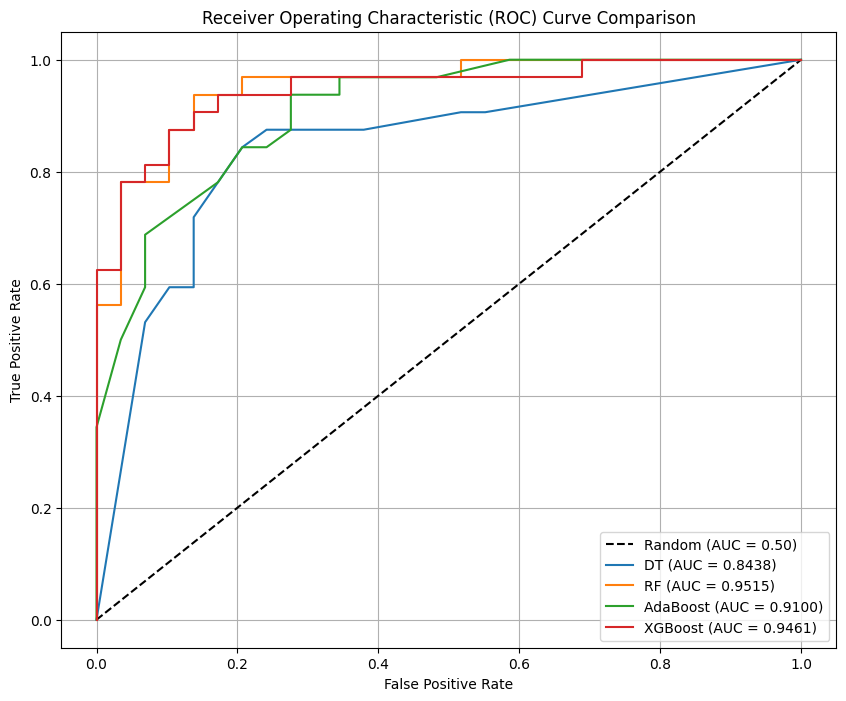

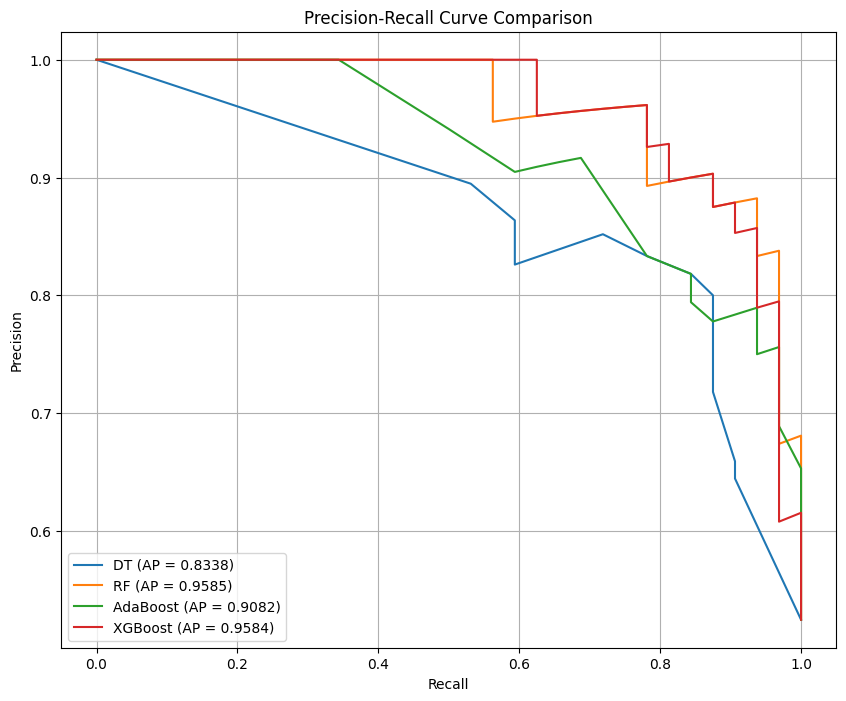


--- Final Model Comparison (F1-Scores) ---
Decision Tree F1: 0.8065
Random Forest F1: 0.8923
AdaBoost F1: 0.8182
XGBoost F1: 0.8889


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# prepare probability results for plotting
dt_probs = best_dt_model.predict_proba(X_test_selected)[:, 1]
rf_probs = best_rf_model.predict_proba(X_test_selected)[:, 1]
ab_probs = best_ab_model.predict_proba(X_test_selected)[:, 1]
xgb_probs = best_xgb_model.predict_proba(X_test_selected)[:, 1]

# consolidate results for easy plotting
model_probs = {
    'DT': dt_probs,
    'RF': rf_probs,
    'AdaBoost': ab_probs,
    'XGBoost': xgb_probs
}

print("\n--- Generating ROC and Precision-Recall Curves ---")

# ROC Curve Plot
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ROC Curve Interpretation:
# The ROC curves confirm the strong dominance of the ensemble methods. The single Decision Tree
# (DT, AUC 0.8438) provides the lowest baseline performance. Random Forest (AUC 0.9515) achieves
# the highest overall discriminatory power across all thresholds, indicating it is the best model at
# correctly separating positive and negative cases generally. XGBoost (AUC 0.9461) shows exceptional
# performance in the low False Positive Rate (FPR) region, suggesting it is highly reliable when
# minimizing false alarms is the primary concern.

# Precision-Recall Curve Plot
plt.figure(figsize=(10, 8))
plt.title('Precision-Recall Curve Comparison')

for name, probs in model_probs.items():
    precision, recall, _ = precision_recall_curve(y_test, probs)
    avg_precision = average_precision_score(y_test, probs)
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Precision-Recall Curve Interpretation:
# The PR curves show that the ensemble models maintain significantly higher Precision across all
# levels of Recall than the DT. Random Forest (AP 0.9585) and XGBoost (AP 0.9584) are nearly tied
# for the most robust performance. Both models maintain Precision above 0.9 even when achieving high
# Recall (>0.8). This high Average Precision (AP) confirms they are excellent for this diagnostic task,
# as they minimize both False Positives (high precision) and False Negatives (high recall).

# Final Model Comparison Summary
print("\n--- Final Model Comparison (F1-Scores) ---")
print(f"Decision Tree F1: {f1:.4f}")
print(f"Random Forest F1: {f1_rf:.4f}")
print(f"AdaBoost F1: {f1_ab:.4f}")
print(f"XGBoost F1: {f1_xgb:.4f}")

# Model Comparison and Final Conclusion:
# Based on the cumulative evidence from all metrics (F1-score) and the plots (AUC/AP), the
# Random Forest model is marginally the overall best performer. It achieved the highest AUC (0.9515),
# the highest F1-score (0.8923), and demonstrates superior stability and balance between critical metrics
# due to its variance-reducing (bagging) mechanism.